In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import kagglehub
import os
# Kaggle dataset link : https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset/data
RAW_DATA_PATH = "data/raw/raw_ecom_customer_churn.csv"


# try:
df = pd.read_csv(RAW_DATA_PATH)

print("first 10 rows:")

display(df.head(5))
print("\nDataset Info:")
df.info()



first 10 rows:


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  Num

In [82]:
df.dropna(inplace=True)  
print("\nNew Dataset Info:")
df.info()


New Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 3774 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   3774 non-null   int64  
 1   Churn                        3774 non-null   int64  
 2   Tenure                       3774 non-null   float64
 3   PreferredLoginDevice         3774 non-null   object 
 4   CityTier                     3774 non-null   int64  
 5   WarehouseToHome              3774 non-null   float64
 6   PreferredPaymentMode         3774 non-null   object 
 7   Gender                       3774 non-null   object 
 8   HourSpendOnApp               3774 non-null   float64
 9   NumberOfDeviceRegistered     3774 non-null   int64  
 10  PreferedOrderCat             3774 non-null   object 
 11  SatisfactionScore            3774 non-null   int64  
 12  MaritalStatus                3774 non-null   object 
 13  Numb

In [83]:
df.shape

(3774, 20)

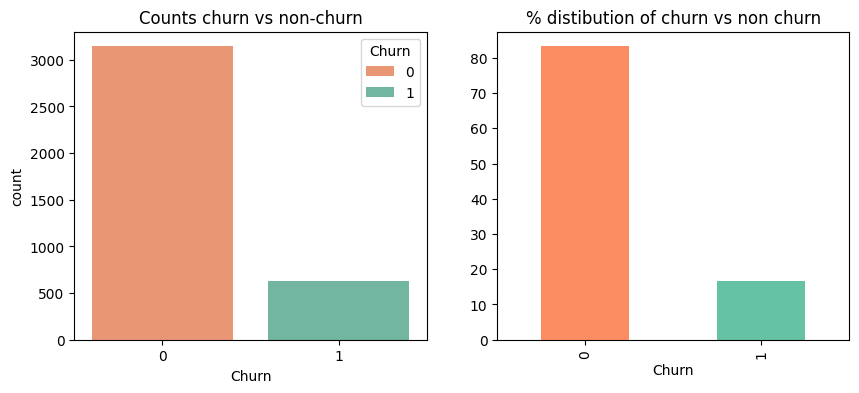

In [84]:
# import matplotlib.pyplot as plt
# import seaborn as sns

colors = [ "#fc8d62", "#66c2a5"]

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Counts
sns.countplot(
    data=df, x="Churn", hue="Churn",
    palette=colors, dodge=False, legend=True, ax=ax[0]
)
ax[0].set_title("Counts churn vs non-churn")

# Percent
(df["Churn"].value_counts(normalize=True) * 100).plot(
    kind="bar", color=colors, ax=ax[1]
)
ax[1].set_title("% distibution of churn vs non churn")

plt.show()

plt.show()

In [85]:
#feature selection. 
customer_ids = df["CustomerID"] # keeping a copy as that is required  to build sample data. 
X = df.drop(['CustomerID', 'Churn'], axis =1)
y = df['Churn']
# X.head(5)


numerical_features = ['Tenure','WarehouseToHome','HourSpendOnApp', 'CityTier', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'SatisfactionScore',  'Complain', 'DaySinceLastOrder', 'CashbackAmount']
categorical_non_binary_features = ['Gender','PreferredLoginDevice','PreferredPaymentMode', 'PreferedOrderCat','MaritalStatus']
# categorical_binary_features = []

base_features = ( numerical_features + 
                #  categorical_binary_features + 
                 categorical_non_binary_features )


print(base_features)

['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'CityTier', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'SatisfactionScore', 'Complain', 'DaySinceLastOrder', 'CashbackAmount', 'Gender', 'PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus']


In [86]:
#feature transformation
X["PreferredLoginDevice"] = (
    X["PreferredLoginDevice"]
    .astype(str)
    .str.strip()
    .replace({"Phone": "Mobile Phone"})
)

X["PreferedOrderCat"] = (
    X["PreferedOrderCat"]
    .astype(str)
    .str.strip()
    .replace({"Mobile": "Mobile Phone"})
)

X["PreferredPaymentMode"] = (
    X["PreferredPaymentMode"]
    .astype(str)
    .str.strip()
    .replace({"COD": "Cash on Delivery"})
    .replace({"CC": "Credit Card"})
)



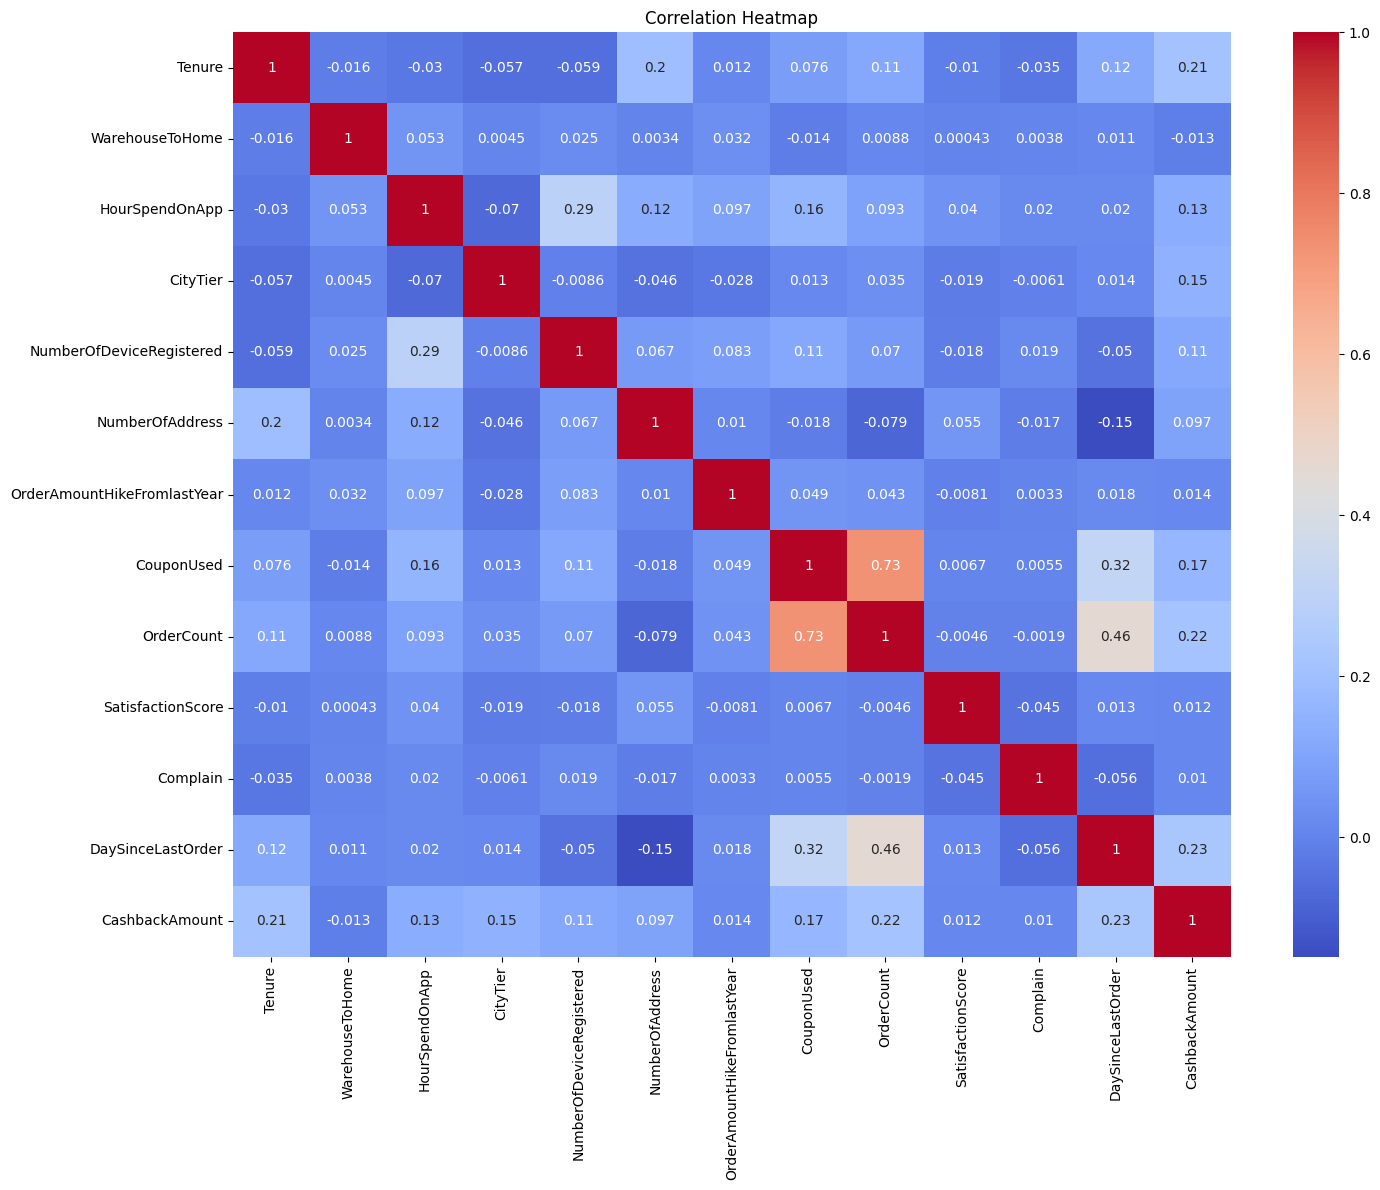

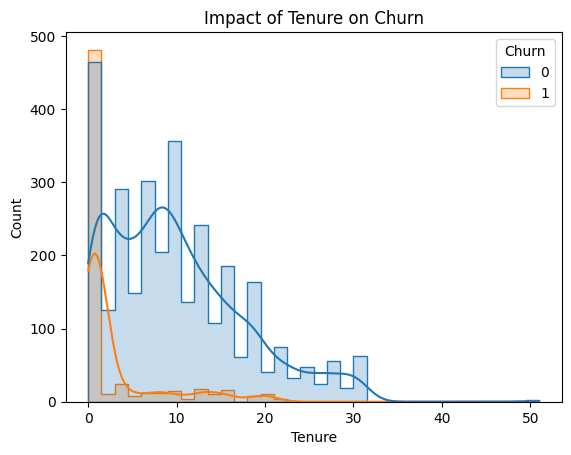

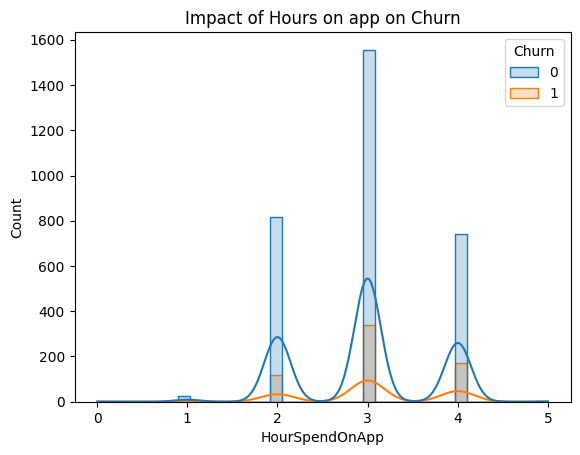

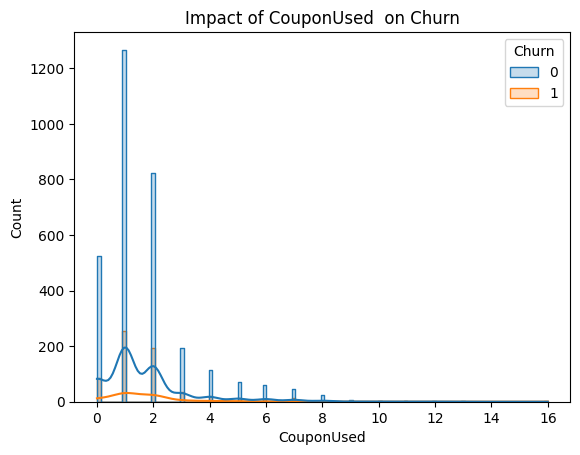

In [87]:
correlation_matrix = df[base_features].corr(numeric_only=True)
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

plt.figure()
sns.histplot(data=df, x="Tenure", hue="Churn", kde=True, element="step")
plt.title("Impact of Tenure on Churn")
plt.show()

plt.figure()
sns.histplot(data=df, x="HourSpendOnApp", hue="Churn", kde=True, element="step")
plt.title("Impact of Hours on app on Churn")
plt.show()

plt.figure()
sns.histplot(data=df, x="CouponUsed", hue="Churn", kde=True, element="step")
plt.title("Impact of CouponUsed  on Churn")
plt.show()


In [88]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

linear_numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])


# encode the categorical non binary columns 
categorical_onehot_transformer = Pipeline([
    ('onehot', OneHotEncoder(drop='first', handle_unknown= 'ignore', sparse_output=False))
    # ('onehot', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', linear_numeric_transformer, numerical_features),
        ('cat', categorical_onehot_transformer, categorical_non_binary_features),
        # ('bin', categorical_onehot_transformer, categorical_binary_features)  # keep binary as is
    ]
)

In [89]:

import pickle
from sklearn.model_selection import train_test_split

# --- CONFIGURATION ---
RAW_DATA_PATH = "data/raw/raw_ecom_customer_churn.csv"
PROCESSED_DATA_PATH = "data/processed"
MODEL_PATH = "output-model"

# Create directories as per assignment structure
os.makedirs(PROCESSED_DATA_PATH, exist_ok=True)
os.makedirs(MODEL_PATH, exist_ok=True)
os.makedirs("data/raw", exist_ok=True)

print(">>> Step 3: Feature Engineering...")

# 80-20 Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

customer_ids_test = customer_ids.loc[X_test.index]

print(customer_ids_test.head(1))

test_dataset = pd.concat([customer_ids_test, X_test, y_test], axis=1)
print(test_dataset.head(3))
test_dataset.to_csv("data/raw/Full_test_raw.csv", index= False)
test_dataset.head(10).to_csv("data/raw/Small_test_raw.csv", index= False)

# Fit preprocessor *only* on training data to avoid leakage
preprocessor.fit(X_train)


# Transform both splits using the fitted preprocessor
X_train_scaled = preprocessor.transform(X_train)
X_test_scaled  = preprocessor.transform(X_test)



# Save the preprocessor (encoders + scaler params)
with open(f"{MODEL_PATH}/preprocessor.pkl", "wb") as f:
    pickle.dump(preprocessor, f)


# pickle.dump(scaler, open(f"{MODEL_PATH}/scaler.pkl", "wb"))

# Save Feature Names (Required to align user input in App)
feature_names = X.columns.tolist()
pickle.dump(feature_names, open(f"{MODEL_PATH}/features.pkl", "wb"))


print("RAW INPUT FEATURES (X.columns):")
for f in X.columns:
    print(f)
print("Count:", len(X.columns))



# Save Data for Training Script
pickle.dump((X_train_scaled, y_train), open(f"{PROCESSED_DATA_PATH}/train_data.pkl", "wb"))
pickle.dump((X_test_scaled, y_test), open(f"{PROCESSED_DATA_PATH}/test_data.pkl", "wb"))

print("pickle file saved.")


feature_names = preprocessor.get_feature_names_out()

print("\nPREPROCESSOR OUTPUT FEATURES:")
for i, f in enumerate(feature_names):
    print(f"{i:02d}: {f}")

print("\nTotal transformed features:", len(feature_names))


>>> Step 3: Feature Engineering...
178    50179
Name: CustomerID, dtype: int64
      CustomerID  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
178        50179     4.0         Mobile Phone         3             13.0   
5627       55628     1.0         Mobile Phone         1             11.0   
4136       54137     8.0         Mobile Phone         3             35.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
178      Cash on Delivery    Male             3.0                         2   
5627           Debit Card    Male             3.0                         2   
4136             E wallet  Female             4.0                         5   

        PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
178   Laptop & Accessory                  2      Divorced                5   
5627  Laptop & Accessory                  4       Married                3   
4136  Laptop & Accessory                  3       Married        

>>> Step 4: Training Models (with SMOTE)...
Applying SMOTE to balance the training set...
Original Training Size: 3019
New Balanced Training Size: 4990


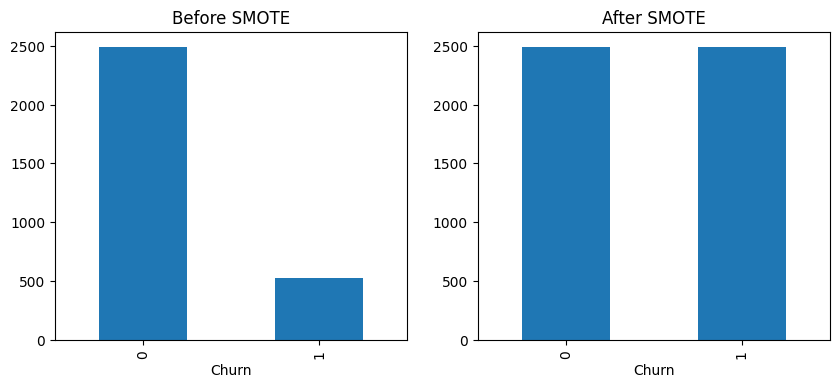

In [90]:
# train_models_smote

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
)

try:
    from imblearn.over_sampling import SMOTE
except ImportError:
    print("Error: imbalanced-learn is not installed.")
    print("Run: pip install imbalanced-learn")
    exit()

# --- CONFIGURATION ---
PROCESSED_DATA_PATH = "data/processed"
MODEL_PATH = "output-model"

print(">>> Step 4: Training Models (with SMOTE)...")

# 1. LOAD DATA
try:
    X_train, y_train = pickle.load(open(f"{PROCESSED_DATA_PATH}/train_data.pkl", "rb"))
    X_test, y_test = pickle.load(open(f"{PROCESSED_DATA_PATH}/test_data.pkl", "rb"))
except FileNotFoundError:
    print("Error: Data not found.")
    exit()

# 2. APPLY SMOTE (Synthetic Minority Over-sampling Technique)
# This creates fake "Churners" to balance the training data perfectly 50/50
print("Applying SMOTE to balance the training set...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(f"Original Training Size: {X_train.shape[0]}")
print(f"New Balanced Training Size: {X_train_resampled.shape[0]}")


fig, ax = plt.subplots(1, 2, figsize=(10, 4))

pd.Series(y_train).value_counts().plot(kind='bar', ax=ax[0], title='Before SMOTE')
pd.Series(y_train_resampled).value_counts().plot(kind='bar', ax=ax[1], title='After SMOTE')

plt.show()



In [91]:


# 3. DEFINE MODELS
# Note: We removed 'class_weight' because SMOTE already balanced the data!
models = {
    "logistic regression": LogisticRegression(max_iter=2000),
    "decision tree": DecisionTreeClassifier(max_depth=6, min_samples_leaf=5),
    "knn": KNeighborsClassifier(n_neighbors=11),
    "naive bayes": GaussianNB(),
    "random forest": RandomForestClassifier(
        n_estimators=150, max_depth=12, random_state=42
    ),
    # XGBoost usually performs best with SMOTE
    "xgboost": XGBClassifier(
        eval_metric="logloss",
        n_estimators=150,
        learning_rate=0.05,
        max_depth=5,
    ),
}

results = {}

# 4. TRAINING LOOP
for name, model in models.items():
    print(f"Training {name}...")

    # Train on RESAMPLED data
    model.fit(X_train_resampled, y_train_resampled)

    # Predict on ORIGINAL test data (Never SMOTE the test set!)
    y_pred = model.predict(X_test)
    y_prob = (
        model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    )

    # Metrics
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "MCC": matthews_corrcoef(y_test, y_pred),
    }
    results[name] = metrics

    # Save Model
    filename = f"{MODEL_PATH}/{name.replace(' ', '_')}.pkl"
    pickle.dump(model, open(filename, "wb"))

print("\n" + "=" * 60)
print("FINAL COMPARISON TABLE (SMOTE)")
print("=" * 60)
results_df = pd.DataFrame(results).T
print(results_df)

# print("\nMODEL EXPECTS FEATURES:")
# print(model.n_features_in_)


Training logistic regression...
Training decision tree...
Training knn...
Training naive bayes...
Training random forest...
Training xgboost...

FINAL COMPARISON TABLE (SMOTE)
                     Accuracy       AUC  Precision    Recall  F1 Score  \
logistic regression  0.810596  0.886379   0.413462  0.803738  0.546032   
decision tree        0.856954  0.911388   0.496732  0.710280  0.584615   
knn                  0.794702  0.944033   0.398305  0.878505  0.548105   
naive bayes          0.241060  0.805152   0.155325  0.981308  0.268199   
random forest        0.952318  0.982751   0.858586  0.794393  0.825243   
xgboost              0.933775  0.954396   0.806452  0.700935  0.750000   

                          MCC  
logistic regression  0.480462  
decision tree        0.513164  
knn                  0.496099  
naive bayes          0.114099  
random forest        0.798491  
xgboost              0.714373  
